In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
pd.set_option('display.max_columns',100) 

In [1]:
df=pd.read_csv(r'C:\Users\91701\Downloads\_Data Analytics  -Indian Stock Market Top 2000.csv')

<IPython.core.display.Javascript object>

In [2]:
df.shape

(6007, 15)

In [3]:
df.head(2)

,Name,Ticker,Sub-Sector,Market Cap,Close Price,PE Ratio,Return on Equity,Return on Assets,Net Proﬁt Margin,5Y Avg EBITDA Margin,EBITDA Margin,1Y Return vs Nifty,5Y CAGR,Debt to Equity,Long Term Debt to Equity
0,Reliance Industries Ltd,RELIANCE,Oil & Gas - Reﬁning & Marketing,1679534.21,2467.4,34.1869038,7.793277014,3.957021119,9.725370333,17.72049438,20.43380916,2.412295035,31.31618013,33.85503708,22.83121016
1,Tata Consultancy Services Ltd,TCS,IT Services & Consulting,1358569.093,3626.7,41.89235563,37.74067975,25.93238229,19.38306507,29.0725284,28.96522046,2.801647939,23.87499408,8.948661432,7.465445194


In [4]:
x=df.iloc[:2015,:]

In [5]:
y=pd.DataFrame(data=df.iloc[2016:4031,:].values,columns=df.iloc[2015].values)

<IPython.core.display.Javascript object>

In [6]:
z=pd.DataFrame(data=df.iloc[4032:,:].values,columns=df.iloc[4031].values)

<IPython.core.display.Javascript object>

In [7]:
x.shape,y.shape,z.shape

((2015, 15), (2015, 15), (1975, 15))

In [8]:
final_df=pd.concat([x,y,z],axis=1)

<IPython.core.display.Javascript object>

In [9]:
final_df.shape

(2015, 45)

In [10]:
final_df.head(3)

,Name,Ticker,Sub-Sector,Market Cap,Close Price,PE Ratio,Return on Equity,Return on Assets,Net Proﬁt Margin,5Y Avg EBITDA Margin,...,Net Income,PBT,Earnings Per Share,EBITDA,Long Term Investments,Reserves & Surplus,Cash and Equivalent,Book Value,Free Cash Flow,Operating Cash Flow
0,Reliance Industries Ltd,RELIANCE,Oil & Gas - Reﬁning & Marketing,1679534.21,2467.4,34.1869038,7.793277014,3.957021119,9.725370333,17.72049438,...,49128,55461,74.65304891,103222,212382,579376,169843,799432,-79652,26185
1,Tata Consultancy Services Ltd,TCS,IT Services & Consulting,1358569.093,3626.7,41.89235563,37.74067975,25.93238229,19.38306507,29.0725284,...,32430,43760,87.04362396,48462,213,86063,38489,87108,35727,38802
2,HDFC Bank Ltd,HDFCBANK,Private Banks,820636.2749,1486.5,25.77925797,16.43520042,1.883433477,20.42091597,28.20611601,...,31833.2,42796.14,57.89926843,44181.15,438823.11,148746.23,121272.52,210442.95,40780.31,42476.46


In [13]:
final_df.drop_duplicates().shape
# NO DUPLICATES

(2015, 45)

In [21]:
# final_df.nunique()

## Task1-Firstly, screen the companies and visualise them according to sub-sectors using a pie chartor a bar charts

### list of sectors and number of companies under those sectors

In [14]:
final_df.groupby('Sub-Sector')['Name'].count().sort_values(ascending=False).reset_index()

,Sub-Sector,Name
0,Pharmaceuticals,104
1,Textiles,86
2,Auto Parts,84
3,Industrial Machinery,76
4,Commodity Chemicals,73
...,...,...
132,Animation,1
133,Building Products - Prefab Structures,1
134,Soft Drinks,1
135,Retail - Online,1


# TOP 20 SECTORS having most companies


<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='Sub-Sector'>

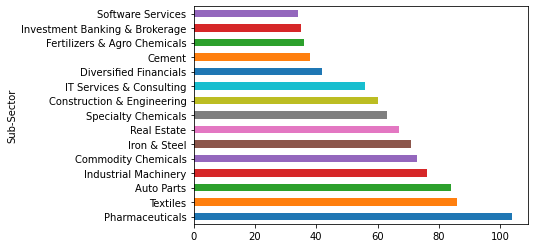

In [35]:
final_df.groupby('Sub-Sector')['Name'].count().sort_values(ascending=False).head(15).plot(kind='barh',color=sns.color_palette())

In [39]:
def company_for_sector(x):
    """List of comapnies for any sector
    """
    return final_df.groupby('Sub-Sector').get_group(x)['Name']


In [40]:
company_for_sector('Real Estate')

51                             DLF Ltd
90            Macrotech Developers Ltd
108              Godrej Properties Ltd
139            Embassy Oﬃce Parks REIT
145                  Oberoi Realty Ltd
                     ...              
1900              Manas Properties Ltd
1925    Gujarat Credit Corporation Ltd
1960             AMJ Land Holdings Ltd
1990                  PVP Ventures Ltd
2005               Zodiac Ventures Ltd
Name: Name, Length: 67, dtype: object

## Task2- visualise the companies by segregating them according to Market Cap in three categories: Large Cap(>20,000 crore), Mid Cap (5,000 to 20,000 crore) &  Small Cap(<5,000).

In [23]:
final_df['Market Cap']=final_df['Market Cap'].astype('float')

In [24]:
final_df['Market Cap'].describe()

count    2.000000e+03
mean     1.316900e+04
std      6.659485e+04
min      1.249950e+02
25%      3.116762e+02
50%      1.039122e+03
75%      5.041667e+03
max      1.679534e+06
Name: Market Cap, dtype: float64

### How many large cap companies are there in wrt market cap

In [27]:
final_df[final_df['Market Cap']>20000].sort_values(by='Market Cap',ascending=False).shape[0]

225

# TOP 10 Large Cap Companies

In [29]:
final_df[final_df['Market Cap']>20000].sort_values(by='Market Cap',ascending=False).head(10)

,Name,Ticker,Sub-Sector,Market Cap,Close Price,PE Ratio,Return on Equity,Return on Assets,Net Proﬁt Margin,5Y Avg EBITDA Margin,EBITDA Margin,1Y Return vs Nifty,5Y CAGR,Debt to Equity,Long Term Debt to Equity,Net Income / Liabilities,5Y Historical Revenue Growth,5Y Historical EBITDA Growth,5Y Hist Op. Cash Flow Growth,5Y Historical EPS Growth,Forward PE Ratio,Enterprise Value,PB Ratio,Dividend Yield,PE Premium vs Sector,Domestic Institutional Holding,Mutual Fund Holding,Promoter Holding,Foreign Institutional Holding,NaN,Retail Investor Holding,Pledged Promoter Holdings,Insurance Firms Holding,No. of Shareholders,Total Revenue,Net Income,PBT,Earnings Per Share,EBITDA,Long Term Investments,Reserves & Surplus,Cash and Equivalent,Book Value,Free Cash Flow,Operating Cash Flow
0,Reliance Industries Ltd,RELIANCE,Oil & Gas - Reﬁning & Marketing,1.679534e+06,2467.4,34.1869038,7.793277014,3.957021119,9.725370333,17.72049438,20.43380916,2.412295035,31.31618013,33.85503708,22.83121016,9.436205542,12.02732304,13.83792269,-7.242711834,8.3409779,25.08885494,1879599.21,2.100909408,0.281831007,87.53127675,13.62091525,4.817100431,50.61460561,24.74887115,NaN,7.651334719,0,6.364201366,3306662,505153,49128,55461,74.65304891,103222,212382,579376,169843,799432,-79652,26185
1,Tata Consultancy Services Ltd,TCS,IT Services & Consulting,1.358569e+06,3626.7,41.89235563,37.74067975,25.93238229,19.38306507,29.0725284,28.96522046,2.801647939,23.87499408,8.948661432,7.465445194,75.62260983,8.410398104,7.497213371,15.21876881,7.100834636,35.21384316,1328550.093,15.59637568,1.034647063,8.064689142,7.930064452,3.323000213,72.18619124,14.9784877,NaN,3.601119681,0.341522426,4.459816757,1577358,167311,32430,43760,87.04362396,48462,213,86063,38489,87108,35727,38802
2,HDFC Bank Ltd,HDFCBANK,Private Banks,8.206363e+05,1486.5,25.77925797,16.43520042,1.883433477,20.42091597,28.20611601,28.34209416,-16.83330963,15.58785742,NaN,NaN,2.003267736,15.9518576,16.88711626,NaN,17.89016358,21.35148421,699996.5149,3.899566485,0.436649564,-2.287744831,22.97863509,14.98319814,25.79868361,37.46545508,NaN,9.776550208,0,2.887513466,1888276,155885.27,31833.2,42796.14,57.89926843,44181.15,438823.11,148746.23,121272.52,210442.95,40780.31,42476.46
3,Infosys Ltd,INFY,IT Services & Consulting,7.775010e+05,1853.05,40.17885257,27.13530492,19.41789465,18.84721397,28.65680212,29.30663368,21.73084371,29.11453485,6.935219192,5.974056419,62.97308731,9.386099507,8.297508096,18.2890488,9.098143868,33.95423899,756200.976,10.12608393,1.4741968,3.644570649,16.30316491,12.79106874,13.11774734,33.17446993,NaN,6.272680891,0,3.195298535,1897185,102673,19351,26628,45.607423,30090,11863,73627,27056,76782,21117,23224
4,ICICI Bank Ltd,ICICIBANK,Private Banks,5.002790e+05,710.75,27.21228275,12.38289733,1.243332695,11.39501193,11.90054301,16.96355449,5.055258022,23.50698673,NaN,NaN,1.303949579,9.734319313,12.55934956,42.31031996,11.4944886,21.91451126,362296.8419,2.992531947,0.276496031,3.143912004,43.7588935,28.20015953,0,45.2944206,NaN,6.799743474,0,12.66445763,1642131,161336.47,18384.31,26028.33,27.46121761,27368.4,536578.62,107231.52,147570.54,167175.84,136327.09,138015.3
5,Hindustan Unilever Ltd,HINDUNILVR,FMCG - Household Products,4.938958e+05,2051.2,61.77558865,28.58419735,17.98791806,16.81211229,23.11852139,24.80496267,-27.38094749,17.82047713,0,0,37.98821629,7.771301682,13.02259169,17.04678775,13.04752087,53.94592732,486737.8312,10.35551288,1.926671388,40.0620246,10.85863308,3.237355034,61.9006753,14.70598472,NaN,11.19207486,0,5.266506562,1137497,47555,7995,10605,35.42099193,11796,2,7089,7178,47694,5000,9163
6,State Bank of India,SBIN,Public Banks,4.479263e+05,490.6,19.99184363,8.234400315,0.494559862,5.814494391,3.930684144,9.474028106,16.08500116,12.49158418,NaN,NaN,0.490285365,7.099937898,12.31192088,44.09086262,9.353178316,13.49957981,109845.1429,1.570637859,0.796971508,-24.22403592,24.0937125,12.90785009,57.6046511,10.37414586,NaN,6.346141099,0,9.935223569,2918312,385337.89,22405.45,32795.96,25.105

### How many mid cap companies are there in wrt market cap

In [31]:
final_df[(final_df['Market Cap']>5000) & (final_df['Market Cap']<20000)].sort_values(by='Market Cap',ascending=False).shape[0]

281

# TOP 10 MID CAP COMPANIES

In [34]:
final_df[(final_df['Market Cap']>5000) & (final_df['Market Cap']<20000)].sort_values(by='Market Cap',ascending=False).head(10)

,Name,Ticker,Sub-Sector,Market Cap,Close Price,PE Ratio,Return on Equity,Return on Assets,Net Proﬁt Margin,5Y Avg EBITDA Margin,EBITDA Margin,1Y Return vs Nifty,5Y CAGR,Debt to Equity,Long Term Debt to Equity,Net Income / Liabilities,5Y Historical Revenue Growth,5Y Historical EBITDA Growth,5Y Hist Op. Cash Flow Growth,5Y Historical EPS Growth,Forward PE Ratio,Enterprise Value,PB Ratio,Dividend Yield,PE Premium vs Sector,Domestic Institutional Holding,Mutual Fund Holding,Promoter Holding,Foreign Institutional Holding,NaN,Retail Investor Holding,Pledged Promoter Holdings,Insurance Firms Holding,No. of Shareholders,Total Revenue,Net Income,PBT,Earnings Per Share,EBITDA,Long Term Investments,Reserves & Surplus,Cash and Equivalent,Book Value,Free Cash Flow,Operating Cash Flow
226,Indian Energy Exchange Ltd,IEX,Power Trading & Consultancy,19991.43329,220.95,97.00341252,43.67470199,24.99545184,57.85307245,80.74526543,81.13016871,62.61518703,NaN,2.110471393,1.801007557,48.38247723,12.22233973,13.97309363,28.15633028,125.3013947,67.8945221,19328.33329,35.96875366,0.597266513,231.2970169,17.66152842,12.36472117,0,31.00899917,NaN,29.41074759,0,0,1219823,356.23,206.09,270.45,2.30199663,289.01,112.16,485.97,704.52,555.8,285.4,306.36
227,CPSE ETF,CPSEETF,Equity,19984.54650,33.23,NaN,NaN,NaN,NaN,NaN,NaN,25.97050833,3.49169229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19984.5465,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,19.99508153,0,0,90895,2363.4,356.13,414.75,25.25671696,456.59,0,372.84,584.14,893.1,529.31,561.02
228,Tanla Platforms Ltd,TANLA,Software Services,19899.61494,1464.75,55.87739012,44.6602794,25.42387401,15.06854532,11.28299491,19.31920115,49.46584613,95.60663126,0.487067518,0.39077371,49.49687283,40.43913162,46.73539637,43.34462949,104.0813928,37.30010407,19319.82494,22.28150817,0.136722696,44.14020656,0.05390454,0.051114761,43.73645678,13.46943059,NaN,4.721489814,0,8.948738554,498573,48231.78,2082.77,3159.61,6.354437139,3539.7,191693.01,31581.67,126693.63,50139.54,37519,37868
229,Bank of India Ltd,BANKINDIA,Public Banks,19717.63497,47.45,9.467024667,4.368037409,0.297549268,4.318252405,-8.587681024,7.338937107,-44.95932175,-18.07828234,NaN,NaN,0.304146244,1.055745093,NaN,15.64132061,NaN,NaN,-106816.685,0.393255203,NaN,-64.11672008,11.25449541,0.806101509,81.41362081,0.778565434,NaN,3.598594312,0,3.754231054,42777,1105.52,288.93,352.56,36.84692169,373.17,0,988.27,1125.17,2400.8,-1079.46,-1071.17
230,Aavas Financiers Ltd,AAVAS,Home Financing,19653.99225,2396.9,68.02336986,12.84498702,3.477669517,26.13521239,32.96495236,33.75515594,-9.747115873,NaN,265.6497834,265.6497834,4.405454939,42.08627708,48.750872,NaN,31.99086257,56.91705846,24906.54225,8.186434627,NaN,157.8319702,9.991756689,4.656911993,39.20603889,40.04874913,NaN,4.27057059,0,4.067820021,362055,45648.54,3149.15,2916.62,36.23529532,3553.52,178292.44,37471.08,54099.56,39480.67,16504.11,17064.55
231,Indian Bank,INDIANB,Public Banks,19497.38103,155.7,6.191315444,10.11459558,0.671278429,6.898687231,6.577505278,7.7845206,14.13964194,-10.1271609,NaN,NaN,0.534993918,20.41227737,26.20818023,NaN,18.29516735,NaN,-34579.57897,0.493846255,1.158480278,-76.5327848,10.5959951,6.221991194,79.85520703,1.850297961,NaN,5.867073539,0,0,249889,12438.58,773.21,934.14,6.900237585,1084.65,12028.23,8392.83,3982.52,15875.52,5911.1,5956.62
232,Mahindra and Mahindra Financial Services Ltd,M&MFIN,Consumer Finance,19478.27670,157.3,25.19144437,5.535936044,0.923822821,6.216224038,17.62658396,8.720046822,-42.96997472,-4.013140349,410.0712922,383.7725001,1.108934798,13.52171389,-3.103339959,NaN,-3.729181324,34.62451522,80695.8567,1.226937871,0.505985468,-4.515760571,15.37873288,9.236240268,52.15575734,19.2386738,NaN,3.081119307,0,0.767999783,77461,6719.05,709.71,1092.67,91.85014425,1651.63,43.97,2902.68,1322.92,3711.02,822.44,1590.25
233,J K Cement Ltd,JKCEMENT,Cement,19432.96513,2452.15,27.38155743,21.12719452,7.708361505,10.56265395,20.27245767,24.58130242,-26.75259328,22.58777833,97.70602153,85.3565866,11.51945229,8.7438822

### How many small cap companies are there in wrt market cap

In [41]:
final_df[(final_df['Market Cap']<5000)].sort_values(by='Market Cap',ascending=False).shape[0]

1494

# TOP 10 small cap companies

In [42]:
final_df[(final_df['Market Cap']<5000)].sort_values(by='Market Cap',ascending=False).head(10)

,Name,Ticker,Sub-Sector,Market Cap,Close Price,PE Ratio,Return on Equity,Return on Assets,Net Proﬁt Margin,5Y Avg EBITDA Margin,EBITDA Margin,1Y Return vs Nifty,5Y CAGR,Debt to Equity,Long Term Debt to Equity,Net Income / Liabilities,5Y Historical Revenue Growth,5Y Historical EBITDA Growth,5Y Hist Op. Cash Flow Growth,5Y Historical EPS Growth,Forward PE Ratio,Enterprise Value,PB Ratio,Dividend Yield,PE Premium vs Sector,Domestic Institutional Holding,Mutual Fund Holding,Promoter Holding,Foreign Institutional Holding,NaN,Retail Investor Holding,Pledged Promoter Holdings,Insurance Firms Holding,No. of Shareholders,Total Revenue,Net Income,PBT,Earnings Per Share,EBITDA,Long Term Investments,Reserves & Surplus,Cash and Equivalent,Book Value,Free Cash Flow,Operating Cash Flow
509,Edelweiss Financial Services Ltd,EDELWEISS,Diversiﬁed Financials,4940.092768,55.5,18.61727065,3.565554606,0.531895595,2.445881361,5.901937535,3.737815529,-50.14509785,-16.49034886,370.4057575,349.4000261,0.696781126,15.54369946,-9.320294261,NaN,-10.39713536,32.57412691,29715.77277,0.64349261,2.61494458,-29.43414033,2.657745227,0.03717474,32.62675164,32.23677731,NaN,6.55281725,0,4.535522396,75060,2405,52.8,84,2.264628181,216.4,180.5,612.2,499.4,1146.6,-49.5,85.5
510,Mahindra Lifespace Developers Ltd,MAHLIFE,Real Estate,4917.349619,319.55,-68.53448947,-4.200463075,-2.805814194,-35.88756065,1.774036772,-29.92547392,66.60565048,20.30506544,14.64305353,4.495302078,NaN,-21.82933272,NaN,NaN,NaN,206.0731543,5068.819619,2.939100114,NaN,-175.1368606,17.37652749,17.03091571,51.34289954,10.61243429,NaN,28.09342102,1.220742102,3.158199982,3478964,8419.88,228.63,439.03,0.815043467,4060.83,4.29,1442.53,346.49,13813.85,4014.66,4148.62
511,TCNS Clothing Co Ltd,TCNSBRANDS,Apparel & Accessories,4897.591456,791.35,-86.86753204,-8.864779874,-4.963618036,-8.236308124,13.69604461,7.511723372,39.0222908,NaN,53.99598033,43.00233664,NaN,7.027224757,NaN,26.55714584,NaN,216.334314,5040.741456,8.002731182,NaN,92.81820526,6.575246112,3.918827896,32.27976461,17.62648213,NaN,8.935124014,0,0,10440,860.6,73.3,98.5,33.35116916,136.7,0,563.6,128.9,585.7,139.7,166
512,HEG Ltd,HEG,Electrical Components & Equipments,4879.629824,1251.3,-271.9972031,-0.512073985,-0.413244081,-1.310311582,30.7933849,3.924361278,-37.36102236,41.95814997,8.527987914,0.023175435,NaN,9.402199239,-17.49910493,23.92685342,NaN,5.40060213,4068.009824,1.396142527,0.237292525,-553.1030088,7.495380421,0.619541042,55.12984336,13.37733207,NaN,0.312031612,0,3.590774437,7008,763.28,40.31,14.88,1.535646133,83.1,0.01,704.05,64.46,1001.75,-270.62,145.23
513,Rallis India Ltd,RALLIS,Fertilizers & Agro Chemicals,4843.247705,250.25,21.18934114,15.22967444,9.075478103,9.218985698,16.29532562,15.09877629,-17.32235575,-0.269535017,4.750893816,1.842927068,22.9227884,9.943996138,8.783726354,-1.357696859,9.772616343,24.67799276,4584.117705,3.043215921,1.204589782,-13.0205137,16.40445112,12.71214177,50.09367308,6.031140508,NaN,13.72763699,0,0,67883,5670.5,336.06,443.97,80.50755494,839.78,0,2050.9,541.09,2084.88,533.55,691.61
514,Jaiprakash Power Ventures Ltd,JPPOWER,Renewable Energy,4831.688473,7,18.08808203,2.611595555,1.533513311,7.431498179,27.87636207,40.34353152,158.4110519,5.327276858,50.38909204,45.78039985,3.998072208,-3.231274578,-11.20792055,-22.00271718,NaN,NaN,9722.128473,0.46852873,NaN,-38.22353808,23.28027807,0,26.01606933,1.015877132,NaN,7.399222947,12.15356375,0,18876,92.81,75.2,87.69,67.94185948,87.72,13545.98,12591.16,1.1,12602.23,67.22,67.25
515,Ingersoll-Rand (India) Ltd,INGERRAND,Industrial Machinery,4805.596640,1566.15,66.4123361,17.39841308,11.81879803,11.47151146,19.03035838,19.61698215,111.4566421,17.50902851,2.116848248,1.333570018,32.65195614,-1.212429715,6.243722922,2.758087278,3.528964585,NaN,4583.77664,10.66322728,0.197070223,10.6321277,4.985124176,4.953604916,75,0.43496262,NaN,14.19333404,0,0.018584521,96198,551.45,37.54,22.52,3.91059633,78.34,0,86.42,254.89,1134.2,75.13,157.65
516,KRBL Ltd,KRBL,Packaged Foods &